## Lab 1: Python Exercises for COMP24112

# 1. Instruction

There are a total of 12 exercises. You are asked to complete all of them. Print out the final results, and comment if needed. Make sure your results can be reproduced by your TA using Restart & Run All.
You are **only** allowed to use libraries in the provided file “Instruction on Mathematical Programming in Python for COMP24112”. Additionally, everything asked to add to a report should be included in one single .pdf file (Arial font 11 or equivalent, maximum two pages, and best to fit within one page).

## 2. Exercises

Start with the provided supporting tutorial "Instruction on Mathematical Programming in Python" and "Maths Knowledge Overview". After you are familiar with the basics, you can proceed to the exercises.


### Exercise 1 (1 mark - easy)

Input a 4 by 4 magic square matrix 
$$\textbf{A}=
\left[
\begin{array}{cccc}
        16   &   3 &  2 & 13 \\
        5    &  10 & 11 &  8 \\
        9    &   6 &  7 & 12 \\
        4    &  15 & 14 &  1 \\
\end{array}
\right]. 
$$  

Generate a 4 by 4 matrix $\textbf{B}$ with random integer entries. Set $\textbf{C}$ to be a 4 by 4 matrix with 1's on the diagonal and 0's elsewhere. Check to see that, $\textbf{A}$, $\textbf{B}$ and $\textbf{C}$ are all present. Compute the sum of the third column of $\textbf{A}$.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random

A = np.array([[16, 3, 2, 13], [5, 10, 11, 8], [9, 6, 7, 12], [4, 15, 14, 1]])

B = np.random.randint(17, size=(4, 4))

C = np.eye(4, dtype=int)

# print(str(A)  + '\n')
# print(str(B)  + '\n')
# print(str(C)  + '\n')

if "A" in globals() and "B" in globals() and "B" in globals():
    print("A, B and C are all present\n")
print("The sum of the third column of A is " + str(np.sum(A[:, 2])))


A, B and C are all present

The sum of the third column of A is 34


In [2]:
print("For inspection, matrix B:\n" + str(B))


For inspection, matrix B:
[[13  9 13  0]
 [13  5 13  9]
 [ 7 13  8 11]
 [10 11 11  7]]


### Exercise 2 (1 mark - easy)

Generate a 4 by 2 matrix consisting of the 1st and 3rd columns of $\textbf{B}$ using the colon operator.

In [3]:
print(np.stack((B[:, 0], B[:, 2])))


[[13 13  7 10]
 [13 13  8 11]]


### Exercise 3 (1 mark - easy)

Generate a 4 by 2 matrix containing two different columns that are randomly selected from the columns of $\textbf{B}$. Generate a 3 by 4 matrix containing three different rows that are randomly selected from the rows of $\textbf{B}$. 

In [4]:
column_indices = random.sample(range(0, len(B[0])), 2)
print(
    str(np.stack((B[:, column_indices[0]], B[:, column_indices[1]])))
    + "\n"
)

row_indices = random.sample(range(0, len(B)), 3)
print(
    (
        np.stack(
            (
                B[row_indices[0], :],
                B[row_indices[1], :],
                B[row_indices[2], :],
            )
        )
    )
)


[[ 9  5 13 11]
 [13 13  8 11]]

[[10 11 11  7]
 [13  5 13  9]
 [ 7 13  8 11]]


### Exercise 4 (1 mark - easy)

The matrix $\textbf{A}$ is a magic square, in which the sum of each row, each column, and each diagonal is the same. First check whether $\textbf{A}$ satisfies this  magic square condition. Then sort the 2nd row of $\textbf{A}$ and print this sorted row using appropriate commands.

In [5]:
column_sums = np.sum(A, axis=0)
row_sums = np.sum(A, axis=1)
l_r_trace = np.trace(A)
r_l_trace = np.trace(np.fliplr(A))

if (
    np.all(column_sums == l_r_trace)
    and np.all(row_sums == r_l_trace)
    and l_r_trace == r_l_trace
):
    print("True, A is a magic square.\n")
else:
    print("False, A is not a magic square.\n")
print("Sorted 2nd row of A: " + str(np.sort(A[1, :])))


True, A is a magic square.

Sorted 2nd row of A: [ 5  8 10 11]


### Exercise 5 (1 mark - easy)

Set $\textbf{B}$ as an identity matrix, multiplication of $\textbf{A}$ by $\textbf{B}$ should yield $\textbf{A}$. Check this. What does component by component multipilication give? Check this. 

In [6]:
B = np.eye(4, dtype=int)

if np.array_equal(A, np.matmul(A, B)):
    print(
        "True, multiplying a matrix by an identity matrix returns the original matrix.\n"
    )
else:
    print(
        "False, multiplying a matrix by an identity matrix returns does not return the original matrix.\n"
    )
print(
    "As expected, component-wise multiplication sets all but diagonal elements to zero:\n"
    + str(np.multiply(A, B))
)


True, multiplying a matrix by an identity matrix returns the original matrix.

As expected, component-wise multiplication sets all but diagonal elements to zero:
[[16  0  0  0]
 [ 0 10  0  0]
 [ 0  0  7  0]
 [ 0  0  0  1]]


### Exercise 6 (1 mark - easy)

Count the number of values of $\textbf{A}$ which are greater than 10 using logical operators.

In [7]:
# counter = 0
# for i in range(len(A)):
#     for j in range(len(A[0])):
#         if A[i, j] > 10:
#             counter += 1
# print(str(counter) + " elements are greater than 10.")

print(str(np.count_nonzero(A > 10)) + " elements are greater than 10.")

6 elements are greater than 10.


### Exercise 7 (1 mark - easy)

The reciprocal of a number $x$ is  $1/x$. Use `for` loops to  create  a new matrix $\textbf{B}$, where each element in $\textbf{B}$ is the reciprocal of the corresponding element in $\textbf{A}$, and sum the columns of $\textbf{B}$. Now create the same matrix $\textbf{B}$ and calculate its column sums in a single operation, using matrix commands, without a `for` loop.

In [8]:
B_1 = np.empty([len(A), len(A[0])])
column_sums_1 = np.array([])
for i in range(len(A)):
    for j in range(len(A[0])):
        B_1[i, j] = 1 / A[i, j]
print("B, for loops:\n" + str(B_1) + "\n")

column_sums_1 = [np.sum(B_1[:, i]) for i in range(len(B[0]))]

print("Column sums, for loops:\n" + str(column_sums_1) + "\n")

B_2 = np.reciprocal(A.astype(float))

print("B, numpy:\n" + str(B_2) + "\n")

column_sums_2 = np.sum(B_2, axis=0)

print("Column sums, numpy:\n" + str(column_sums_2) + "\n")

if np.array_equal(B_1, B_2):
    print("Both methods produce the same B matrix.")
else:
    print("Methods do not produce the same B matrix.")
if np.array_equal(column_sums_1, column_sums_2):
    print("Both methods find the same column sums.")
else:
    print("Both methods do not find the same column sums.")


B, for loops:
[[0.0625     0.33333333 0.5        0.07692308]
 [0.2        0.1        0.09090909 0.125     ]
 [0.11111111 0.16666667 0.14285714 0.08333333]
 [0.25       0.06666667 0.07142857 1.        ]]

Column sums, for loops:
[0.6236111111111111, 0.6666666666666666, 0.8051948051948052, 1.2852564102564101]

B, numpy:
[[0.0625     0.33333333 0.5        0.07692308]
 [0.2        0.1        0.09090909 0.125     ]
 [0.11111111 0.16666667 0.14285714 0.08333333]
 [0.25       0.06666667 0.07142857 1.        ]]

Column sums, numpy:
[0.62361111 0.66666667 0.80519481 1.28525641]

Both methods produce the same B matrix.
Both methods find the same column sums.


### Exercise 8 (1 mark - easy)

Plot the log and square root of the integers from $1$ to $100$ in one single figure. Provide axis names, legend and title for the figure.

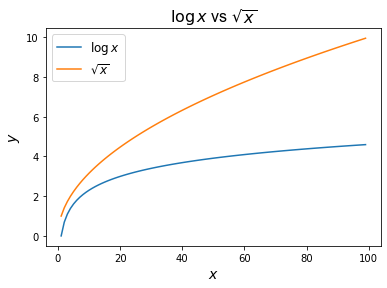

In [9]:
x = np.arange(1, 100, 1)
y_1 = np.log(x)
y_2 = np.sqrt(x)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x, y_1, label=r"$\log{x}$")
ax.plot(x, y_2, label=r"$\sqrt{x}$")

ax.set_title("$\log{x}$ vs $\sqrt{x}$", fontsize=16, fontname="Arial")
ax.set_xlabel("$x$", fontsize=14, fontname="Arial")
ax.set_ylabel(r"$y$", fontsize=14, fontname="Arial")
ax.legend(loc="upper left", fontsize=12)


### Exercise 9 (2 marks - normal)

Let $\boldsymbol{y} $ be an $N$-dimensional column vector with $y_i$ denoting its $i$-th element. 
Let $\textbf{X}$ be an $N$ by $D$ matrix and $\boldsymbol{x}_{i}$ be a column vector which is the transpose of the $i$-th row of $\textbf{X}$.
Let $\boldsymbol{w}$ be a $D$-dimensional column vector. 
Choose a value for $N$ and a value for $D$ as you like, generate $\boldsymbol{y}$, $\textbf{X}$ and $\boldsymbol{w}$ containing random elements.
Use matrix operations and `for` loops to verify the following two quantities are equal. 
$$ \boldsymbol{g}_1 = \textbf{X}^T\textbf{X} \boldsymbol{w}-\textbf{X}^T \boldsymbol{y}$$
$$ \boldsymbol{g}_2 = \sum_{i=1}^N \left(\boldsymbol{x}_{i}^T \boldsymbol{w}- y_i\right) \boldsymbol{x}_{i}$$

Define an example case for your convenience with $N=2$ and $D=3$, calculate $ \boldsymbol{g}_1$ and $\boldsymbol{g}_2$ by hand and write down the calcualtion step by step in the report.

In [10]:
N = 2022
D = 2502

y = np.random.rand(N, 1)
X = np.random.rand(N, D)
w = np.random.rand(D, 1)

g_1 = np.matmul(np.matmul(X.T, X), w) - np.matmul(X.T, y)

g_2 = np.zeros(g_1.shape)

for i in range(N):
    x_i = X[i][:, np.newaxis]
    y_i = y[i]
    g_2 += (np.matmul(x_i.T, w) - y_i) * x_i
if np.allclose(g_1, g_2):
    print(
        "Both methods return the same column vector within a negligeable element-wise error."
    )
else:
    print("Both methods do not return the same column vector.")


Both methods return the same column vector within a negligeable element-wise error.


### Exercise 10 (2 marks - normal)

Calculate the derivative of function $f(x) = x^2+3x+1$ at 10 randomly chosen values of $x$. Write a user-defined function for calculating an approximated derivative of an input function based on 

$$\frac{d f(x)}{d x}=\frac{f(x+\Delta x)-f(x)}{\Delta x} ~ .$$

Use this function to calculate the approximated derivative for $f(x) = x^2+3x+1$ at the same 10 chosen values of $x$ for $\Delta x = 1$, $\Delta x = 0.1$ and $\Delta x = 0.001$. Plot your derivatives and the approximated derivatives in the same figure. Provide axis names, legend and title for the figure. Explain which $\Delta x$ gives you a better approximation and analyse how the choice of $\Delta x$ affects the approximation in the report.

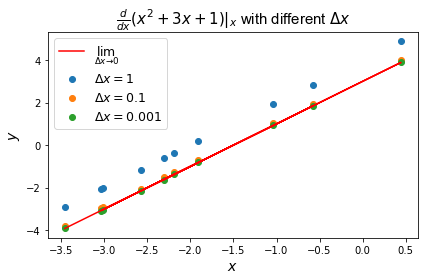

In [16]:
sample_center = -1.5

interval_length = 4

n_datapoints = 1000

interval = np.linspace(
    sample_center - interval_length / 2,
    sample_center + interval_length / 2,
    n_datapoints,
)


def function(x):
    return x**2 + 3 * x + 1


def function_derivative(x):
    return 2 * x + 3


def derivative_approximation(x, delta_x):
    return (function(x + delta_x) - function(x)) / delta_x


sample_x = np.array(random.sample(list(interval), 10))

exact_derivatives = function_derivative(sample_x)

approximate_derivatives_1 = derivative_approximation(sample_x, delta_x=1)

approximate_derivatives_2 = derivative_approximation(sample_x, delta_x=0.1)

approximate_derivatives_3 = derivative_approximation(sample_x, delta_x=0.001)


fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(sample_x, exact_derivatives, label=r"$\lim_{\Delta {x} \to 0}$", c = 'r')
ax.scatter(sample_x, approximate_derivatives_1, label=r"$\Delta{x}=1$")
ax.scatter(sample_x, approximate_derivatives_2, label=r"$\Delta{x}=0.1$")
ax.scatter(sample_x, approximate_derivatives_3, label=r"$\Delta{x}=0.001$")

ax.set_title(
    r"$\left. \frac{d}{dx}(x^2+3x+1)\right|_{x} $ with different $\Delta {x}$",
    fontsize=15,
    fontname="Arial",
)
ax.set_xlabel("$x$", fontsize=14, fontname="Arial")
ax.set_ylabel(r"$y$", fontsize=14, fontname="Arial")
ax.legend(loc="upper left", fontsize=12.5)

plt.tight_layout()


### Exercise 11 (3 marks - normal)

Given two $d$-dimensional data points $\boldsymbol{x} = [x_1,x_2,\dots,x_d]$ and $\boldsymbol{y}=[y_1,y_2,\dots,y_d]$. The Euclidean distance between these two points is computed as 

$$
d(\boldsymbol{x},\boldsymbol{y}) = \sqrt{\sum_{i=1}^d (x_i-y_i)^2} = \sqrt{\boldsymbol{x}\boldsymbol{x}^T - 2\boldsymbol{x}\boldsymbol{y}^T+\boldsymbol{y}\boldsymbol{y}^T}.
$$

Generate $5$ random $3$-dimensional points and store them in a $5\times 3$ matrix called $\textbf{A}$ ($5$ rows and $3$ columns). Generate another $8$ random $3$-dimensional points and store them in a $8\times 3$ matrix called $\textbf{B}$ ($8$ rows and $3$ columns). Calculate the Euclidean distance between the $5$ and $8$ points, and store these distances in a $5\times 8$ matrix called $\textbf{D}$ using `for` loops ($5$ rows and $8$ colums).

* Calculate the Euclidean distances between the 5 and 8 points, and store these distances in a $5\times 8$ matrix called $\boldsymbol{D}$ using `for` loops (5 rows and 8 columns). 
* Calculate  $\boldsymbol{D}$ using algebraic matrix operations without using any loop.  Explain how you derive the solution in the report. 


In [12]:
A = np.random.rand(5, 3)
B = np.random.rand(8, 3)

D_1 = np.empty([5, 8])

for i in range(len(A)):
    for j in range(len(B)):
        distance_squared = 0
        for k in range(len(A[i])):
            distance_squared += (A[i, k] - B[j, k]) ** 2
        D_1[i, j] = np.sqrt(distance_squared)

D_2 = np.sqrt(
    np.sum(A**2, axis=1)[:, np.newaxis] + np.sum(B**2, axis=1) - 2 * np.dot(A, B.T)
)

if np.allclose(D_1, D_2):
    print(
        "Both methods return the same Euclidean distance matrix within a negligeable element-wise error."
    )
else:
    print("Both methods do not return the same Euclidean distance matrix.")


Both methods return the same Euclidean distance matrix within a negligeable element-wise error.


### Exercise 12 (5 marks - hard)

This is a challenging exercise that requires some significant effort and time. Implement from scratch a piece of Python code that can be used to solve the following optimisation problem:
$$\min_{-4 \leq x \leq 6} x^4 -4x^3 +60\sin(x) +50\cos(x).$$
  Explain your solution and discuss its advantage and limitation in the report.  You are encouraged to design the solution from scratch based on what you  have known. But you are allowed to seek support from existing literature and solve the problem using new self-learned knowledge, and in this case you need to provide references to the used knowledge resources that help you come up with a solution. What is not allowed is to use any optimisation library and any readily provided implementation (even with minor modifications). The solution should be implemented from scratch by yourself. 

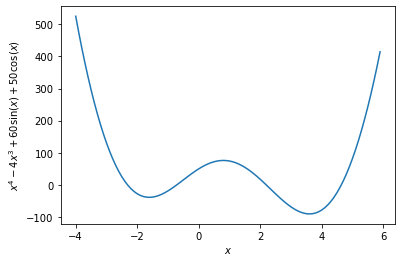

In [13]:
# You can observe the plot of the function by running this cell

import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**4 - 4 * x**3 + 60 * np.sin(x) + 50 * np.cos(x)

lb = -4.
ub = 6.
x = np.arange(lb,ub,0.1)
fx = f(x)

plt.plot(x,fx)
plt.xlabel("$x$")
plt.ylabel("$x^4 - 4x^3 + 60\sin(x) +50\cos(x)$")
plt.show()

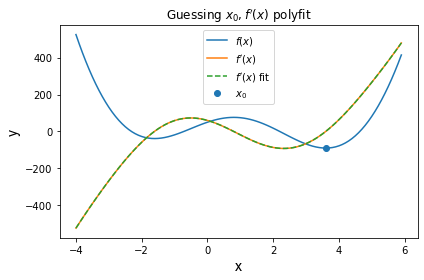

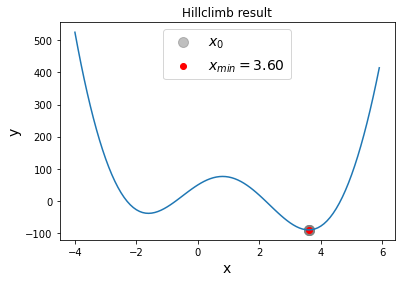

f(3.6041) = -90.0527 was found as the minimum from the hillclimb.
This took 45 iterations.


In [15]:
def f(x):
    return x**4 - 4 * x**3 + 60 * np.sin(x) + 50 * np.cos(x)


def derivative_approximation(x, delta_x):
    return (f(x + delta_x) - f(x)) / delta_x


def find_initial_guess(x, delta_x, poly_degree, lb, ub):
    """
    Guesses a minimum using a polyfit to a derivative approximation.
    Means of finding the initial guess to eliminate the scenarios where the
    hillclimb gets stuck in a local minimum rather than a global one.
    """
    # find approximate derivative values in the interval according to the
    # definition with a small delta x
    approximate_derivative = derivative_approximation(x, delta_x)
    derivative_fit = np.polyfit(x, approximate_derivative, poly_degree)
    # find the roots of this polynomial
    roots = np.roots(derivative_fit)
    # filter them wrt boundary conditions
    filtered_roots = np.sort(roots[np.logical_and(roots < ub, roots > lb)])
    # initial guess is the root where the value of the function is smallest
    return filtered_roots[np.argmin(f(filtered_roots))], derivative_fit


def hill_climbing(x_start, step, tolerance):
    """""
    Adapted from PHYS20161 example code (lect. Lloyd Cawthorne)
    """ ""
    difference = 1
    minimum = f(x_start)
    counter = 0

    while difference > tolerance:
        counter += 1
        minimum_test_minus = f(x_start - step)
        minimum_test_plus = f(x_start + step)
        if minimum_test_minus < minimum:
            x_start -= step
            difference = minimum - minimum_test_minus
            minimum = f(x_start)
        elif f(x_start + step) < minimum:
            x_start += step
            difference = minimum - minimum_test_plus
            minimum = f(x_start)
        else:
            step = step * 0.1
    return x_start, minimum, counter


def random_start():
    return lb + np.random.rand() * (ub - lb)


def plot_result(x, x_minimum, starting_values):
    figure = plt.figure()

    plot = figure.add_subplot(111)
    plot.set_title("Hillclimb result")
    plot.set_xlabel("x", fontsize=14)
    plot.set_ylabel("y", fontsize=14)

    plot.scatter(
        np.real(starting_values),
        f(np.real(starting_values)),
        s=100,
        label=r"$x_0$",
        color="grey",
        alpha=0.5,
    )
    plot.scatter(
        np.real(x_minimum),
        f(np.real(x_minimum)),
        label=r"$x_{{min}} = {0:.2f}$".format(np.real(x_minimum)),
        color="red",
    )
    plot.plot(x, f(x))
    plot.legend(fontsize=14)
    plt.show()
    return None


delta_x = 0.01
step = 0.01
tolerance = 0.00001
poly_degree = 10
lb = -4.0
ub = 6.0
total_searches = 5

x = np.arange(lb, ub, 0.1)
fx = f(x)

initial_guess, derivative_fit = find_initial_guess(x, delta_x, poly_degree, lb, ub)

approximate_derivative = derivative_approximation(x, delta_x)
polynomial_derivative_approximation = np.polyval(derivative_fit, x)

fig = plt.figure()
ax_1 = fig.add_subplot(111)

ax_1.plot(x, fx, label="$f(x)$")
ax_1.plot(x, approximate_derivative, label=r"$f'(x)$")
ax_1.plot(x, polynomial_derivative_approximation, "--", label=r"$f'(x)$ fit")
ax_1.scatter(np.real(initial_guess), f(np.real(initial_guess)), label=r"$x_0$")
ax_1.set_title("Guessing $x_0, f'(x)$ polyfit")
ax_1.set_xlabel("x", fontsize=14, fontname="Arial")
ax_1.set_ylabel("y", fontsize=14, fontname="Arial")
ax_1.legend(loc="upper center", fontsize=10)
plt.tight_layout()

starting_values = np.array([initial_guess])
x_minimum, minimum, count = hill_climbing(initial_guess, step, tolerance)
searches = 1
while searches < total_searches:
    searches += 1
    x_start = random_start()
    starting_values = np.append(starting_values, initial_guess)
    (x_minimum_test, minimum_test, count_temp) = hill_climbing(
        initial_guess, step, tolerance
    )
    if minimum_test < minimum:
        minimum = minimum_test
        x_minimum = x_minimum_test
    count += count_temp
plot_result(x, x_minimum, starting_values)
print(
    "f({0:.4f}) = {1:.4f} was found as the minimum from the hillclimb.".format(
        np.real(x_minimum), np.real(minimum)
    )
)
print("This took {:d} iterations.".format(count))
